# Neuron

Basic simple unit for the network trained for a classification task in
2-dimensional space and two possible classes (0 or 1).

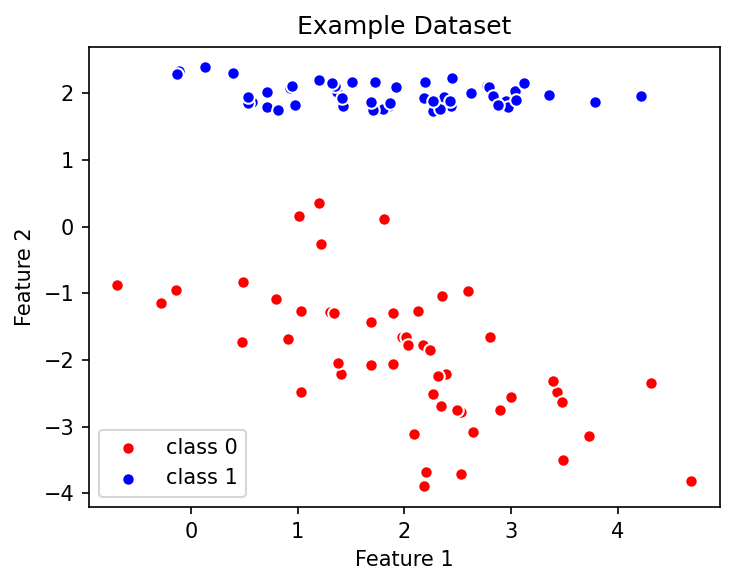

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X, y = [
    np.array(i)
    for i in make_classification(
        n_samples=100,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_clusters_per_class=1,
        class_sep=2,
        random_state=0,
    )
]

cls0 = X[y == 0].T
cls1 = X[y == 1].T

plt.figure(figsize=(5, 4), dpi=150)
plt.title("Example Dataset")

plt.scatter(cls0[0], cls0[1], c="r", ec="w", label="class 0")
plt.scatter(cls1[0], cls1[1], c="b", ec="w", label="class 1")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()

## Scikit-Learn "Neuron"

First let's see how _scikit-learn_ implementation performs for this simple task.

scikit-learn neuron accuracy: 1.0


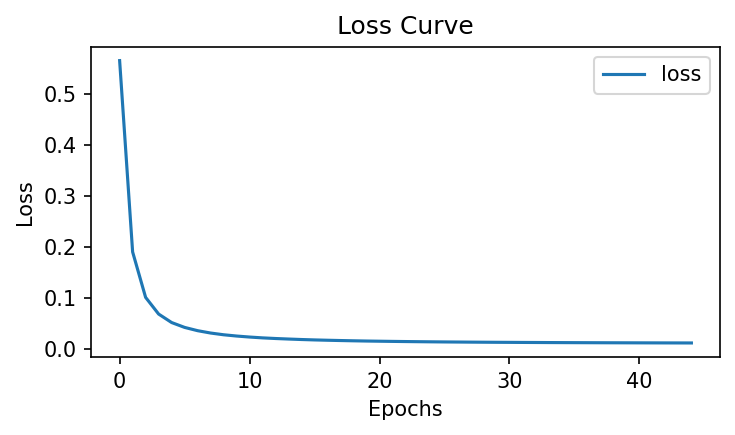

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

from plotting import loss_curve

mlp = MLPClassifier(
    hidden_layer_sizes=(1,),  # only 1 neuron
    activation="logistic",
    solver="sgd",
    learning_rate_init=0.03,
    batch_size=1,
    max_iter=1000,
)
mlp.fit(X, y)
pred = mlp.predict(X)

accuracy = accuracy_score(y, pred)
print(f"scikit-learn neuron accuracy: {accuracy}")

loss_curve(mlp.loss_curve_)

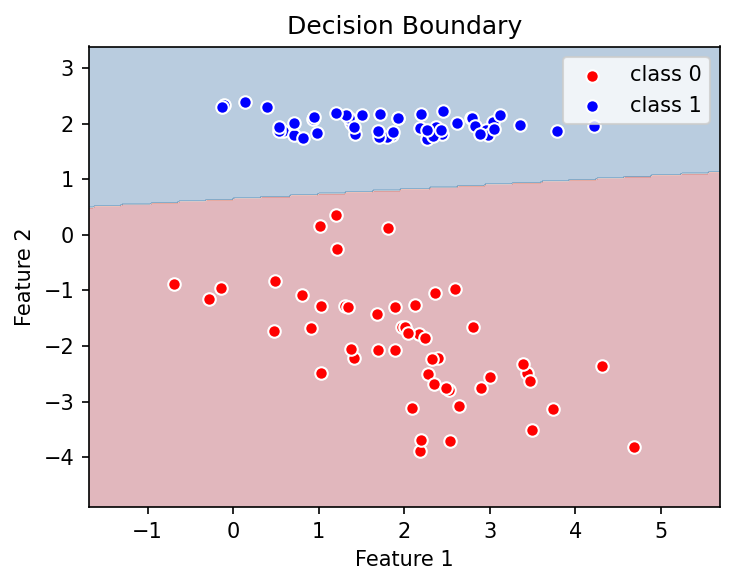

In [3]:
from plotting import decision_boundary

decision_boundary(X, y, mlp)

## Our Neuron

neuron accuracy: 1.0


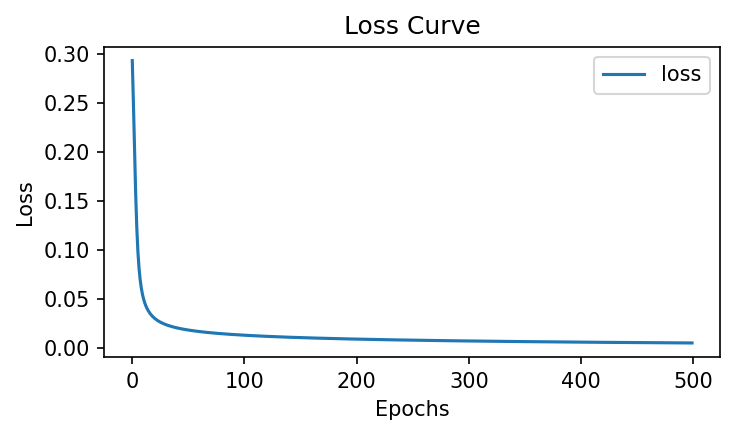

In [4]:
from network.neuron import Neuron

neuron = Neuron(activation="logistic", learning_rate=0.003, max_iter=500)
loss = neuron.train(X, y)
pred = neuron.predict(X)
accuracy = accuracy_score(y, pred)
print(f"neuron accuracy: {accuracy}")

loss_curve(loss)

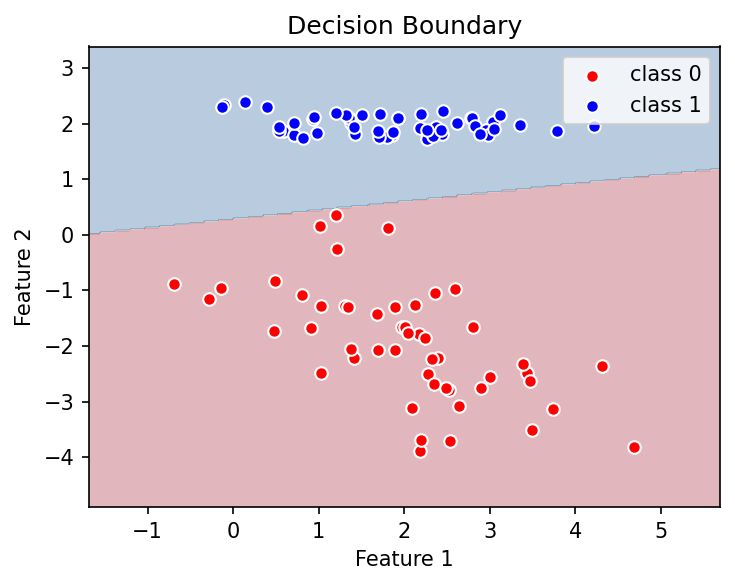

In [5]:
decision_boundary(X, y, neuron)